In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pickle

In [2]:
# !pip install sklearn

In [3]:
df1 = pd.read_csv('Feature_1.csv',index_col=None)
df2 = pd.read_csv('Feature_2.csv',index_col=None)

In [4]:
df1 = df1.add_suffix("_d1")
df2 = df2.add_suffix("_d2")

In [5]:
df = df1.merge(df2,left_on="image_d1",right_on="image_d2")

In [6]:
df = df.drop(columns=['image_d2','label_d2'])

In [7]:
df = df.rename(columns={'image_d1':'image','label_d1':'label'})

In [8]:
df = df.drop(columns=['image'],axis=1)

In [9]:
# df.head(1).to_csv('x.csv')

In [10]:
X = df.drop('label', axis=1)
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [12]:
X_train.columns

Index(['contrast_0_d1', 'dissimilarity_0_d1', 'homogeneity_0_d1',
       'energy_0_d1', 'correlation_0_d1', 'contrast_1_d1',
       'dissimilarity_1_d1', 'homogeneity_1_d1', 'energy_1_d1',
       'correlation_1_d1', 'contrast_2_d1', 'dissimilarity_2_d1',
       'homogeneity_2_d1', 'energy_2_d1', 'correlation_2_d1', 'contrast_3_d1',
       'dissimilarity_3_d1', 'homogeneity_3_d1', 'energy_3_d1',
       'correlation_3_d1', 'contrast_0_d2', 'dissimilarity_0_d2',
       'homogeneity_0_d2', 'energy_0_d2', 'correlation_0_d2', 'contrast_1_d2',
       'dissimilarity_1_d2', 'homogeneity_1_d2', 'energy_1_d2',
       'correlation_1_d2', 'contrast_2_d2', 'dissimilarity_2_d2',
       'homogeneity_2_d2', 'energy_2_d2', 'correlation_2_d2', 'contrast_3_d2',
       'dissimilarity_3_d2', 'homogeneity_3_d2', 'energy_3_d2',
       'correlation_3_d2'],
      dtype='object')

In [13]:
# X = df.drop('label', axis=1)
# y = df['label']

In [14]:
# from sklearn.feature_selection import chi2

# # X is the input feature matrix and y is the target variable
# # Calculate the chi-squared statistic and p-values for each feature
# chi2_stat, p_values = chi2(X, y)

# # Calculate the Fischer's score for each feature
# fisher_score = chi2_stat / (X.shape[0] * p_values)

# # Plot the Fischer's score values
# plt.bar(range(len(fisher_score)), fisher_score)
# plt.xticks(range(len(fisher_score)), range(1, len(fisher_score)+1))
# plt.xlabel('Feature')
# plt.ylabel('Fischer Score')
# plt.show()


# shows 6,11,14,19,13

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('mlp', MLPClassifier()),
])

In [17]:
param_grid = {
    'pca__n_components': [10,15,20,25],
    'mlp__hidden_layer_sizes': [(10,), (20,), (30,)],
    'mlp__alpha': [0.01, 0.1, 1],
    'mlp__learning_rate_init': [0.1, 0.01],
    'mlp__max_iter': [100, 200,500,800,1000,2000,5000],
}

In [18]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vinu/anaconda3/lib/python3.9/site-packages

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__alpha': [0.01, 0.1, 1],
                         'mlp__hidden_layer_sizes': [(10,), (20,), (30,)],
                         'mlp__learning_rate_init': [0.1, 0.01],
                         'mlp__max_iter': [100, 200, 500, 800, 1000, 2000,
                                           5000],
                         'pca__n_components': [10, 15, 20, 25]})

In [19]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Validation score: ", grid_search.best_score_)

Best hyperparameters:  {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate_init': 0.1, 'mlp__max_iter': 200, 'pca__n_components': 10}
Validation score:  1.0


In [20]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score: ", test_score)

Test score:  0.9925373134328358


In [3]:
filename = 'finalized_model.sav'
# pickle.dump(best_model, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [4]:
loaded_model = pickle.load(open(filename, 'rb'))

In [21]:
# from sklearn.tree import export_graphviz
# dot_data = export_graphviz(loaded_model)  
# graph = graphviz.Source(dot_data)  
# graph.render("pnn_structure", view=True)

In [ ]:
y_pred = loaded_model.predict(X_test)
print(result)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[57,  0],
       [ 3, 74]])

In [65]:
test = X_test.head(1)

In [51]:
test

,contrast_0_d1,dissimilarity_0_d1,homogeneity_0_d1,energy_0_d1,correlation_0_d1,contrast_1_d1,dissimilarity_1_d1,homogeneity_1_d1,energy_1_d1,correlation_1_d1,...,contrast_2_d2,dissimilarity_2_d2,homogeneity_2_d2,energy_2_d2,correlation_2_d2,contrast_3_d2,dissimilarity_3_d2,homogeneity_3_d2,energy_3_d2,correlation_3_d2
115,241.054688,282.0,515.976562,754.0,0.945312,1.105882,2.023438,2.956863,0.996293,0.995663,...,0.984191,0.988405,0.927319,0.928676,0.922303,0.924823,0.943904,0.967452,0.881839,0.912974


In [49]:
y_pred = grid_search.best_estimator_.predict(test)

# Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)

In [50]:
y_pred

array([1])

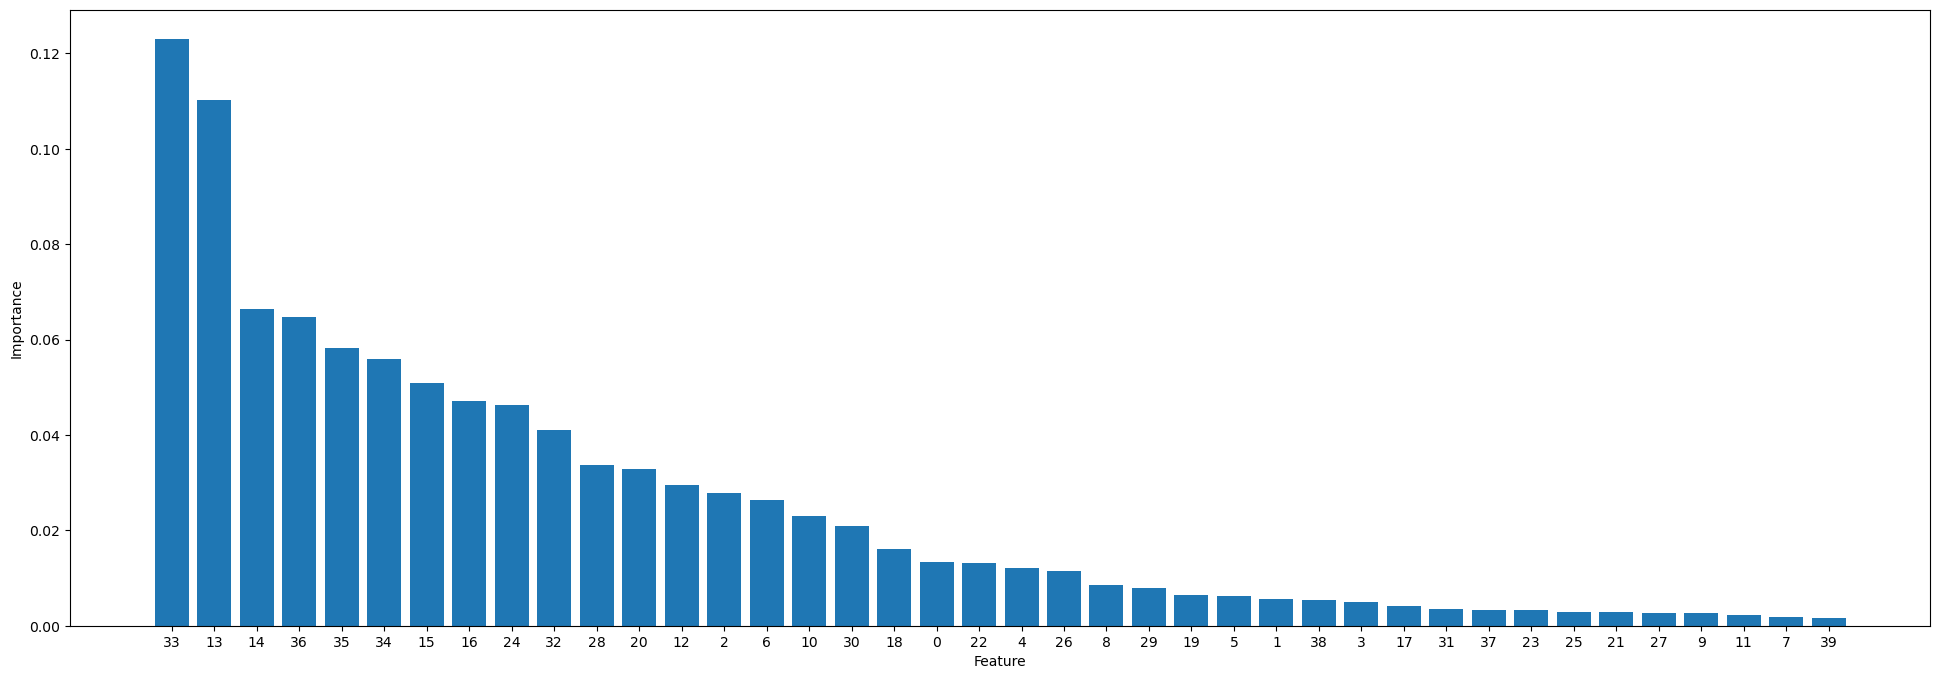

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# X is the input feature matrix and y is the target variable
# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on X and y
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
plt.figure(figsize=(24,8))
# Plot the feature importances
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), sorted_indices)
plt.xlabel('Feature')
plt.ylabel('Importance')

plt.show()

In [32]:
X.iloc[:, 35]

0      0.862451
1      0.868109
2      0.790354
3      0.864869
4      0.860020
         ...   
263    0.764797
264    0.773375
265    0.706324
266    0.739961
267    0.661416
Name: contrast_3_d2, Length: 268, dtype: float64